# Projet

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart_2020_cleaned.csv')

## Exploration

In [33]:
df.shape

(319795, 18)

In [34]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

On peut observer les valeurs continues

In [35]:
dfNumber = df.select_dtypes('float64')
dfNumber.head(2)


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0


Et les valeurs discrètes 

In [36]:
dfObject = df.select_dtypes('object')
dfObject.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No


Quantité de valeus nulles => Le fichier ne contient aucune valeur nulle 

In [37]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [38]:
one_hot_sex = pd.get_dummies(df['Sex'])
df = df.drop('Sex',axis = 1)
df = df.join(one_hot_sex)
  
one_hot_ageCategory = pd.get_dummies(df['AgeCategory'])
df = df.drop('AgeCategory',axis = 1)
df = df.join(one_hot_ageCategory)

one_hot_race = pd.get_dummies(df['Race'])
df = df.drop('Race',axis = 1)
df = df.join(one_hot_race)

one_hot_genHealth = pd.get_dummies(df['GenHealth'])
df = df.drop('GenHealth',axis = 1)
df = df.join(one_hot_genHealth)

df = df.replace("No", 0).replace("Yes", 1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Asian,Black,Hispanic,Other,White,Excellent,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


si les données sont corrélées entre elles, si à l’aide
d’une représentation graphique de vos données vous pouvez déjà tirer des théories sur les
features représentant le plus d’informations

=> Il y a 27373 personnes sur les 319795 qui souffrent de maladies cardiaques

=> Sur les 27373 personnes, 16037 d'entre elles fument, 1141 boivent de l'alcool, 890 fument et boivent

=> Sur les 27373 personnes, 15497 ont un temps de sommeil inférieur aux 8 heures recommandées

In [39]:
df[df['HeartDisease'] == 1].count()

HeartDisease                      27373
BMI                               27373
Smoking                           27373
AlcoholDrinking                   27373
Stroke                            27373
PhysicalHealth                    27373
MentalHealth                      27373
DiffWalking                       27373
Diabetic                          27373
PhysicalActivity                  27373
SleepTime                         27373
Asthma                            27373
KidneyDisease                     27373
SkinCancer                        27373
Female                            27373
Male                              27373
18-24                             27373
25-29                             27373
30-34                             27373
35-39                             27373
40-44                             27373
45-49                             27373
50-54                             27373
55-59                             27373
60-64                             27373


In [40]:
df[df['HeartDisease'] == 1].count()

HeartDisease                      27373
BMI                               27373
Smoking                           27373
AlcoholDrinking                   27373
Stroke                            27373
PhysicalHealth                    27373
MentalHealth                      27373
DiffWalking                       27373
Diabetic                          27373
PhysicalActivity                  27373
SleepTime                         27373
Asthma                            27373
KidneyDisease                     27373
SkinCancer                        27373
Female                            27373
Male                              27373
18-24                             27373
25-29                             27373
30-34                             27373
35-39                             27373
40-44                             27373
45-49                             27373
50-54                             27373
55-59                             27373
60-64                             27373


In [41]:
df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)].count()

HeartDisease                      16037
BMI                               16037
Smoking                           16037
AlcoholDrinking                   16037
Stroke                            16037
PhysicalHealth                    16037
MentalHealth                      16037
DiffWalking                       16037
Diabetic                          16037
PhysicalActivity                  16037
SleepTime                         16037
Asthma                            16037
KidneyDisease                     16037
SkinCancer                        16037
Female                            16037
Male                              16037
18-24                             16037
25-29                             16037
30-34                             16037
35-39                             16037
40-44                             16037
45-49                             16037
50-54                             16037
55-59                             16037
60-64                             16037


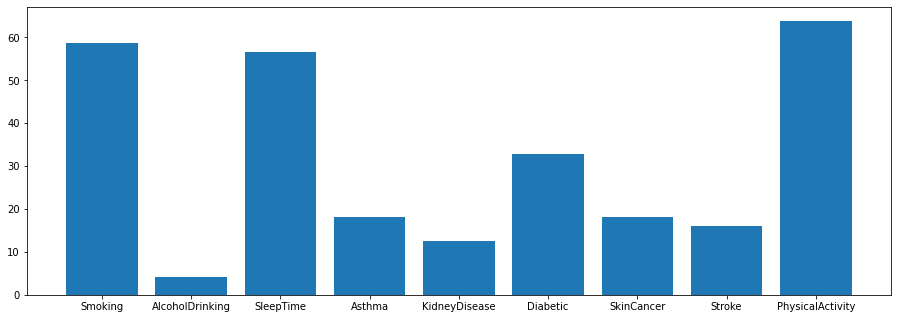

Smoking : 58.586928725386336
AlcoholDrinking : 4.168341066013955
SleepTime : 56.614181858035295
Asthma : 18.021407956745698
KidneyDisease : 12.621926716107112
Diabetic : 32.722025353450476
SkinCancer : 18.19310999890403
Stroke : 16.034048149636504
PhysicalActivity : 63.89142585759691


In [42]:
heartDiseased = df[df['HeartDisease'] == 1]
smoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)]) / len(heartDiseased) * 100
alcool = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)]) / len(heartDiseased) * 100
sleeptime = len(df[(df['HeartDisease'] == 1) & (df['SleepTime'] < 8)]) / len(heartDiseased) * 100
asthma = len(df[(df['HeartDisease'] == 1) & (df['Asthma'] == 1)]) / len(heartDiseased) * 100
kidney = len(df[(df['HeartDisease'] == 1) & (df['KidneyDisease'] == 1)]) / len(heartDiseased) * 100
diabetic = len(df[(df['HeartDisease'] == 1) & (df['Diabetic'] == 1)]) / len(heartDiseased) * 100
skinCancer = len(df[(df['HeartDisease'] == 1) & (df['SkinCancer'] == 1)]) / len(heartDiseased) * 100
stroke = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1)]) / len(heartDiseased) * 100
physicalActivity = len(df[(df['HeartDisease'] == 1) & (df['PhysicalActivity'] == 1)]) / len(heartDiseased) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'Asthma', 'KidneyDisease', 'Diabetic', 'SkinCancer', 'Stroke', 'PhysicalActivity']
stats = [smoking, alcool, sleeptime, asthma, kidney, diabetic, skinCancer, stroke, physicalActivity]
ax.bar(criterias, stats)
plt.show()

print(f"Smoking : {smoking}")
print(f"AlcoholDrinking : {alcool}")
print(f"SleepTime : {sleeptime}")
print(f"Asthma : {asthma}")
print(f"KidneyDisease : {kidney}")
print(f"Diabetic : {diabetic}")
print(f"SkinCancer : {skinCancer}")
print(f"Stroke : {stroke}")
print(f"PhysicalActivity : {physicalActivity}")

réaliser une comparaison entre
différents modèles

 Sélectionné le ou les modèles les plus prometteurs selon vous

Améliorer les performances de vos / votre modèle sélectionnés

BMI


C:\Users\hugoa\AppData\Local\Temp\ipykernel_10880\1291757220.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  current = heartDiseased.drop('HeartDisease', 1)


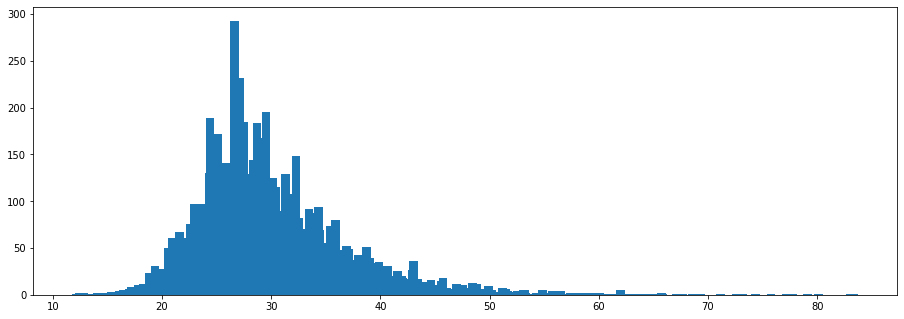

Smoking


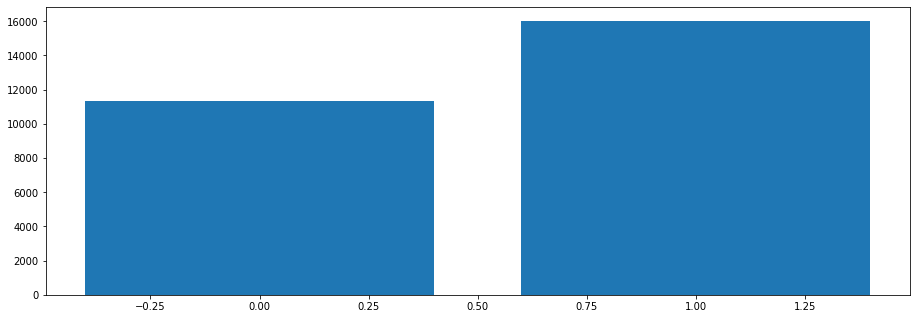

AlcoholDrinking


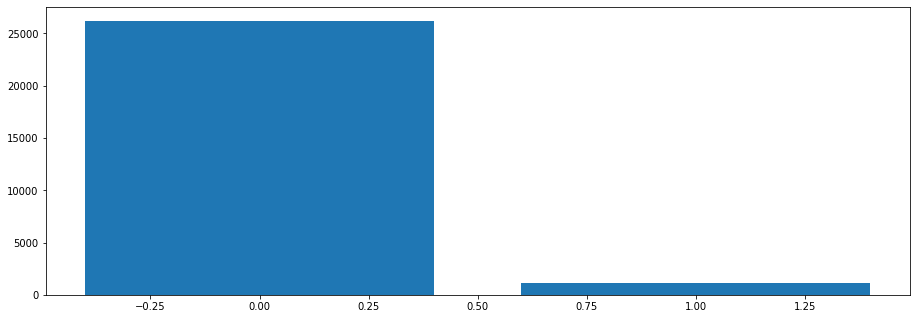

Stroke


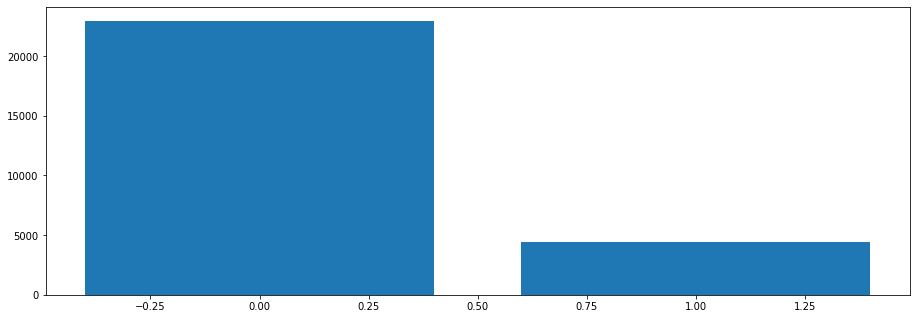

PhysicalHealth


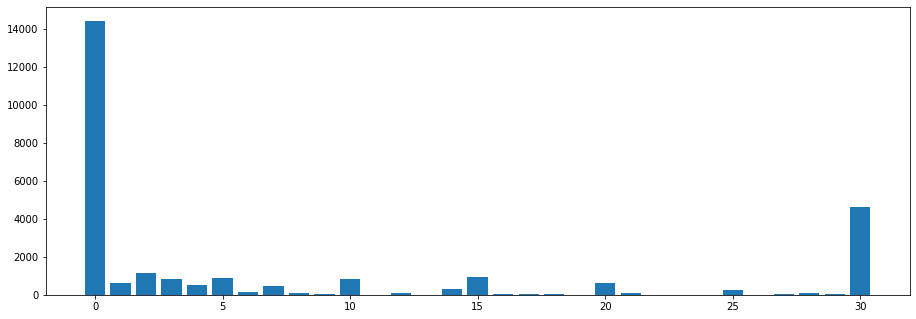

MentalHealth


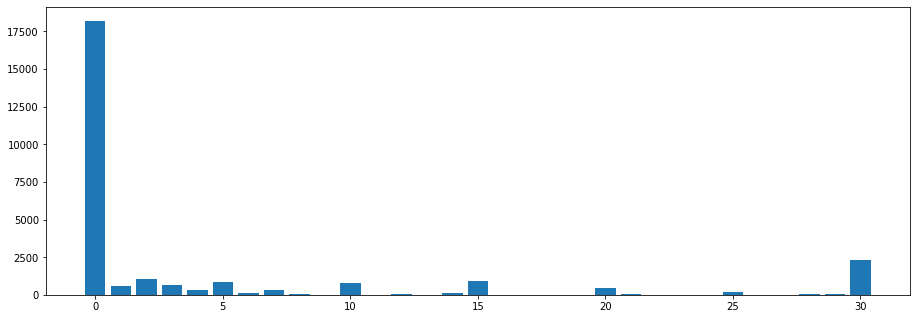

DiffWalking


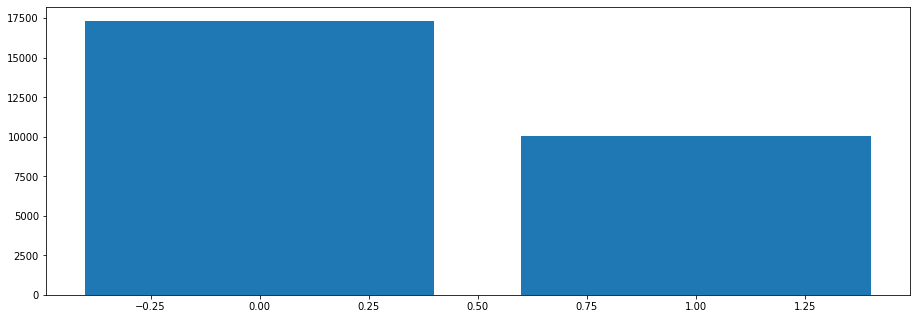

Diabetic


TypeError: the dtypes of parameters x (<U23) and width (float64) are incompatible

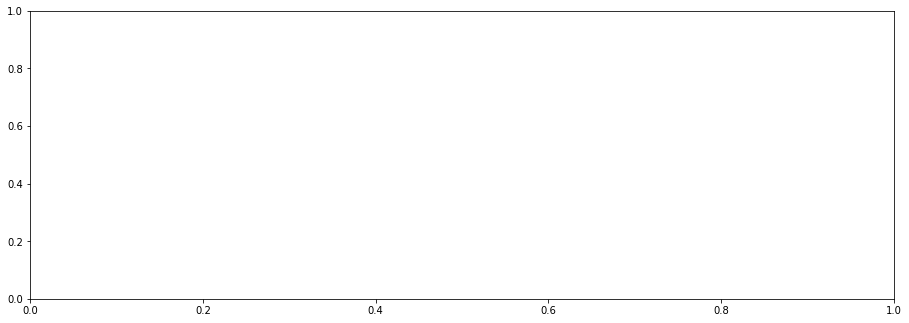

In [43]:
current = heartDiseased.drop('HeartDisease', 1)
for str in current.columns:
    print(str)
    values = current[str].value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(values.index.tolist(), values.tolist())
    plt.show()
